In [1]:
import pandas as pd
import numpy as np
import fect_py as fpy
from fect_py import Fect

# Visualizing the treatment and outcome variables
Before conducting any statistical analysis, we use the panelView package to visualize the treatment and outcome variables in the data. The following line of code plots the treatment status of all units in simdata:

In [2]:
simdata = pd.read_csv("simdata_pd.csv")
simdata.head()

,Unnamed: 0,id,time,Y,error,eff,tr_cum,tr_prob,D,X1,X2,alpha,xi,F1,F2,L1,L2,FL1,FL2
0,1,101.0,1.0,12.158520,-3.942640,0.0,0.0,0.020786,0.0,1.299638,0.598438,1.512877,2.648558,0.235272,0.466011,1.085529,1.209466,0.255395,0.563624
1,2,101.0,2.0,15.083915,-0.519325,0.0,0.0,0.078042,0.0,-0.029369,-0.274701,1.512877,4.031925,0.289348,2.126607,1.085529,1.209466,0.314096,2.572059
2,3,101.0,3.0,14.850594,1.718292,0.0,0.0,0.027329,0.0,-2.236622,0.526919,1.512877,2.709409,0.474655,0.847377,1.085529,1.209466,0.515252,1.024874
3,4,101.0,4.0,16.579266,0.265574,0.0,0.0,0.025334,0.0,0.545030,0.830335,1.512877,2.350941,0.433300,0.758785,1.085529,1.209466,0.470360,0.917725
4,5,101.0,5.0,6.784694,0.243195,0.0,0.0,0.053190,0.0,0.830842,-3.091013,1.512877,2.534275,0.633395,1.838184,1.085529,1.209466,0.687569,2.223221


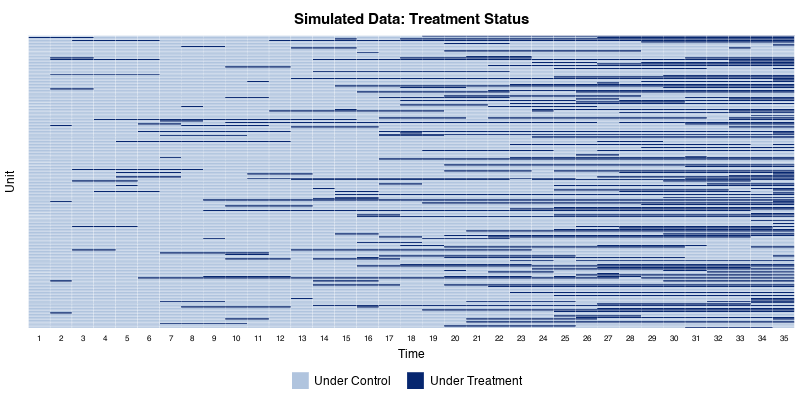

In [3]:
pn = fpy.panelview("Y~D",data=simdata, index=["id","time"],axis_lab="time", xlab = "Time", ylab = "Unit", 
              background = "white", main = "Simulated Data: Treatment Status")
fpy.png_show(pn)

We then take a look at the outcome variable. In the figure below, blue and gray represent treatment and control conditions.

R[write to console]: Treatment has reversals.




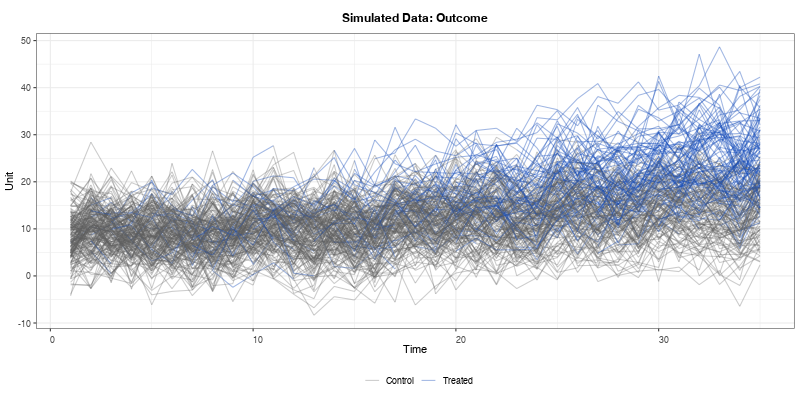

In [4]:
pn = fpy.panelview("Y ~ D", data = simdata, index = ["id","time"],
               axis_lab = "time", xlab = "Time", ylab = "Unit",
               theme_bw = True, ptype = "outcome", main = "Simulated Data: Outcome")
#> Treatment has reversals.
fpy.png_show(pn)

In [28]:
fpy.savefig("test_pn_fig.png")   #save the figure

# Counterfactual estimators
In the current version of fect, we use three methods to make counterfactual predictions by specifying the method option: “fe” (two-way fixed effects, default), “ife” (interactive fixed effects), and “mc” (matrix completion method). First, we illustrate the main syntax of fect using the “fe” method.

## Two-way Fixed Effects Coutnerfacutal (FEct)
This estimator is also independently proposed by Borusyak, Jaravel, and Spiess (2021) and Gardner (2021), who refer to it as the “imputation method” and “two-stage DID,” respectively.

**Estimation**. We estimate the average treatment effect on the treated (ATT) using the following information: the outcome variable 𝑌, binary treatment variable 𝐷, two observed covariates 𝑋1 and 𝑋2, and the unit and time indicators 𝑖𝑑 and 𝑡𝑖𝑚𝑒, respectively. The first variable on the right hand side of the formula is the treatment indicator 𝐷; the rest of the right-hand-side variables serve as controls. The index option specifies the unit and time indicators. The force option (“none”, “unit”, “time”, and “two-way”) specifies the additive component(s) of the fixed effects included in the model. The default option is “two-way” (including both unit and time fixed effects).

In [5]:
out_fect = Fect()
out_fect.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "fe", force = "two-way")

Here `Fect()` is a class with model setup and other parameters. `Fect.fect_out` is the model settings; `Fect.parameter` is a dictionary of output parameters of a certain estimation; `Fect.plot_para` is used for figure plotting (usually you should not set it manually). You can get access to these features with the following methods. Notice that all the items in `Fect.parameter` can be treated as iterabel objects in python. You can extract them with the corresponding key.

In [1]:
# print(out_fect.getFect())

In [13]:
print(out_fect.getPara().keys())
print(out_fect.getPara()["Y_dat"])

dict_keys(['Y_dat', 'D_dat', 'I_dat', 'Y', 'D', 'X', 'T_on', 'G', 'balance_period', 'hasRevs', 'T_off', 'T_on_balance', 'index', 'id', 'rawtime', 'binary', 'loo', 'proportion', 'pre_periods', 'tost_threshold', 'placeboTest', 'placebo_period', 'carryoverTest', 'carryover_period', 'unit_type', 'obs_missing', 'obs_missing_balance', 'method', 'Y_ct', 'Y_ct_full', 'eff', 'I', 'II', 'att_avg', 'att_avg_unit', 'force', 'T', 'N', 'Ntr', 'Nco', 'tr', 'co', 'p', 'r_cv', 'IC', 'beta', 'est', 'mu', 'niter', 'validX', 'validF', 'time', 'att', 'count', 'eff_calendar', 'N_calendar', 'eff_calendar_fit', 'calendar_enp', 'eff_pre', 'eff_pre_equiv', 'pre_sd', 'PC', 'sigma2', 'sigma2_fect', 'res', 'res_full', 'rmse', 'time_off', 'att_off', 'count_off', 'eff_off', 'eff_off_equiv', 'off_sd', 'alpha', 'xi', 'alpha_tr', 'alpha_co', 'formula'])


**Visualization**. We can use the plot function to visualize the estimation results. By default, the plot function produces a “gap” plot – as if we type plot(out.fect, type = "gap") — which visualizes the estimated period-wise ATT (dynamic treatment effects). For your reference, the true population average effects in **simdata** go from 1 to 3 from the 1st to the 10th post-treatment period.

The bar plot at the bottom of the plot shows the number of treated units for each time period.The options cex.main, cex.lab, cex.axis, and cex.text adjust the font sizes of the title, axis labels, axis numbers, and in-graph text, respectively.

Users can choose to plot only those periods whose number of treated observations exceeds a threshold, which is set as a proportion of the largest number of treated observations in a period (the default is proportion = 0.3).

Users can use the `Fect.setPlot()` method to set the plotting parameters.

R[write to console]: Uncertainty estimates not available.




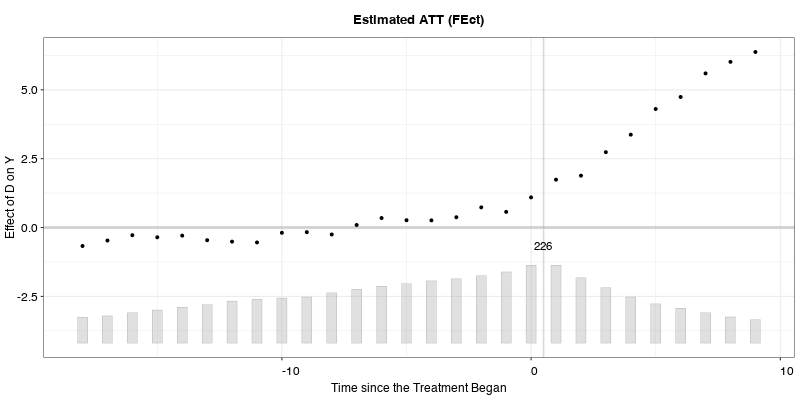

In [5]:
out_fect.setPlot(main = "Estimated ATT (FEct)", ylab = "Effect of D on Y", 
  cex_main = 0.8, cex_lab = 0.8, cex_axis = 0.8)
fpy.png_show(out_fect.plot_para)
#> Uncertainty estimates not available.


**Uncertainty estimates**. The algorithm produces uncertainty estimates when se = TRUE. One can use the non-parametric bootstrap procedure by setting vartype = "bootstrap". Note that it only works well when the number of units is relatively large and many experience the treatment condition. The number of bootstrap runs is set by nboots.

Alternatively, users can obtain uncertainty estimates using the jackknife method by specifying vartype = "jackknife". The algorithm obtains standard errors by iteratively dropping one unit (the entire time-series) from the dataset.

Parallel computing will speed up both cross-validation and uncertainty estimation significantly. When parallel = TRUE (default) and cores options are omitted, the algorithm will detect the number of available cores on your computer automatically. (Warning: it may consume most of your computer’s computational power if all cores are being used.)

In [6]:
out_fect.setFect("Y ~ D + X1 + X2", data = simdata, index =["id","time"], 
  method = "fe", force = "two-way", se = True, parallel = True, nboots = 200)

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




The plot can then visualize the estimated period-wise ATTs as well as their uncertainty estimates. stats = "F.p" shows the p-value for the F test of no-pretrend (more details below).

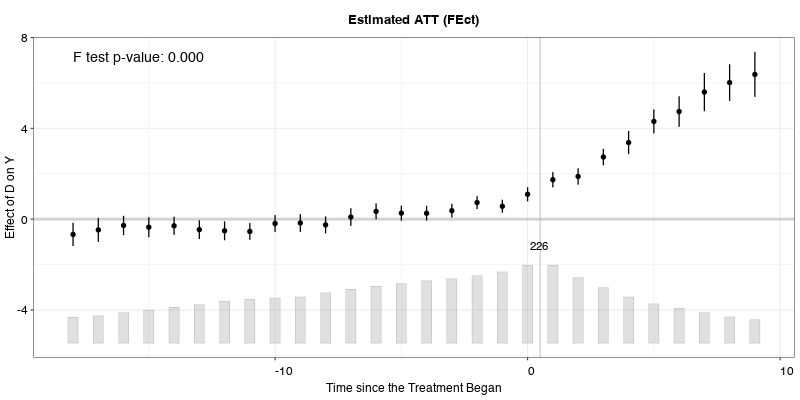

In [7]:
out_fect.setPlot(main = "Estimated ATT (FEct)", ylab = "Effect of D on Y", 
  cex_main = 0.8, cex_lab = 0.8, cex_axis = 0.8, stats = "F.p")
fpy.png_show(out_fect.plot_para)

# The interactive fixed effects counterfactual (IFEct) estimator
In addition to two-way fixed effects, fect also supports the interactive fixed effects (IFE) method proposed by Gobillon and Magnac (2016) and Xu (2017) and the matrix completion (MC) method proposed by Athey et al. (2021)—method = "ife" and method = "mc", respectively. We use EM algorithm to impute the counterfactuals of treated observations.

For the IFE approach, we need to specify the number of factors using option r. For the MC method, we need to specify the tuning parameter in the penalty term using option lambda. By default, the algorithm will select an optimal hyper-parameter via a built-in cross-validation procedure.

Choosing the number of factors. We provide a cross-validation procedure (by setting CV = TRUE) to help determine the tuning parameter in IFE and MC methods. By default, the cross-validation procedure is run for k rounds (k = 10) and the candidate tuning parameter corresponding to the minimal mean squared prediction error is selected (criterion = "mspe").

In each round, some untreated observations are removed as the testing set to evaluate the prediction ability of the model with a certain tuning parameter. The option cv.prop specifies the size of testing set comparing to the set of observations under control (default: cv.prop = 0.1). If we want to restrict the testing set to untreated observations only from treated units (those whose treatment statuses have changed), set cv.treat = TRUE.

An additional issue is the serial correlation within a unit. We remove a consecutive number of observations from a unit as elements in the testing set in order to avoid over fitting caused by serial correlation. The consecutive number is specified in option cv.nobs (e.g. when cv.nobs = 3, the test set is a number of triplets).

We can also remove triplets in the fitting procedure but only include the middle observation of each triplet in the test set using the option cv.donut (e.g. when cv.donut = 1, the first and the last observation in each removed triplet will not be included in the test set).

Hyper-parameter tuning The package offers several criteria when tuning hyper-parameters. For the IFE method, we can set criterion = "pc" to select the hyper-parameter based on the information criterion. If we want to select the hyper-parameter based on mean-squared prediction errors from cross-validation to get a better prediction ability, set criterion = "mspe" (default), and to alleviate the impact of some outlier prediction errors, we allow the criterion of geometric-mean squared prediction errors (criterion = "gmspe"). If one wants to select the hyper-parameter that yields a better pre-trend fitting on test sets rather than a better prediction ability, set criterion = "moment" (we average the residuals in test sets by their relative periods to treatments and then average the squares of these period-wise deviations weighted by the number of observations at each period) .

For the IFE method, we need to specify an interval of candidate number of unobserved factors in option r like r=c(0,5). When cross-validation is switched off, the first element in r will be set as the number of factors. Below we use the MSPE criterion and search the number of factors from 0 to 5.

In [8]:
out_ife = Fect()
out_ife.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
          force = "two-way", method = "ife", CV = True, r = [0, 5], 
          se = True, nboots = 200, parallel = True)

R[write to console]: Parallel computing ...


R[write to console]: Cross-validating ...


R[write to console]: Criterion: Mean Squared Prediction Error


R[write to console]: Interactive fixed effects model...


R[write to console]: 
 r = 0; sigma2 = 6.35460; IC = 2.21891; PC = 6.08178; MSPE = 7.03824

R[write to console]: 
 r = 1; sigma2 = 4.52698; IC = 2.24325; PC = 5.26760; MSPE = 5.54161

R[write to console]: 
 r = 2; sigma2 = 3.89603; IC = 2.45349; PC = 5.33953; MSPE = 4.87403

R[write to console]: *

R[write to console]: 
 r = 3; sigma2 = 3.79056; IC = 2.78325; PC = 5.98062; MSPE = 5.45394

R[write to console]: 
 r = 4; sigma2 = 3.67967; IC = 3.10762; PC = 6.56967; MSPE = 6.17860

R[write to console]: 
 r = 5; sigma2 = 3.57625; IC = 3.43005; PC = 7.12886; MSPE = 6.89839

R[write to console]: 

 r* = 2

R[write to console]: 



R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




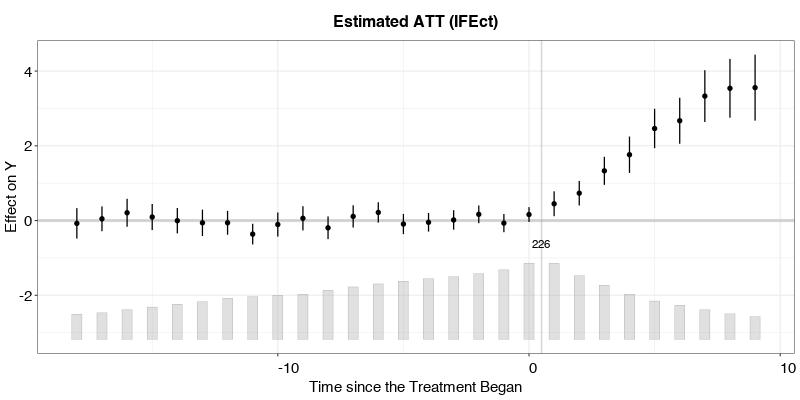

In [9]:
out_ife.setPlot(main = "Estimated ATT (IFEct)")
fpy.png_show(out_ife.plot_para)

# The matrix completion (MC) estimator
For the MC method, we also need to specify a sequence of candidate tuning parameters. For example, we can specify lambda = c(1, 0.8, 0.6, 0.4, 0.2, 0.05). If users don’t have any prior knowledge to set candidate tuning parameters, a number of candidate tuning parameters can be generated automatically based on the information from the outcome variable. We specify the number in option nlambda, e.g. nlambda = 10

In [10]:
out_mc = Fect()
out_mc.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
          force = "two-way", method = "mc", CV = True, 
          se = True, nboots = 200, parallel = True)

R[write to console]: Parallel computing ...


R[write to console]: Cross-validating ...


R[write to console]: Criterion: Mean Squared Prediction Error


R[write to console]: Matrix completion method...


R[write to console]: 
 lambda.norm = 1.00000; MSPE = 7.26193; MSPTATT = 0.28561; MSE = 5.80999

R[write to console]: 
 lambda.norm = 0.42170; MSPE = 5.67678; MSPTATT = 0.12218; MSE = 4.15356

R[write to console]: 
 lambda.norm = 0.17783; MSPE = 5.29813; MSPTATT = 0.04007; MSE = 1.57548

R[write to console]: *

R[write to console]: 
 lambda.norm = 0.07499; MSPE = 5.49257; MSPTATT = 0.00815; MSE = 0.28590

R[write to console]: 
 lambda.norm = 0.03162; MSPE = 5.76950; MSPTATT = 0.00170; MSE = 0.05133

R[write to console]: 
 lambda.norm = 0.01334; MSPE = 6.76974; MSPTATT = 0.00034; MSE = 0.00914

R[write to console]: 

 lambda.norm* = 0.177827941003892

R[write to console]: 



R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




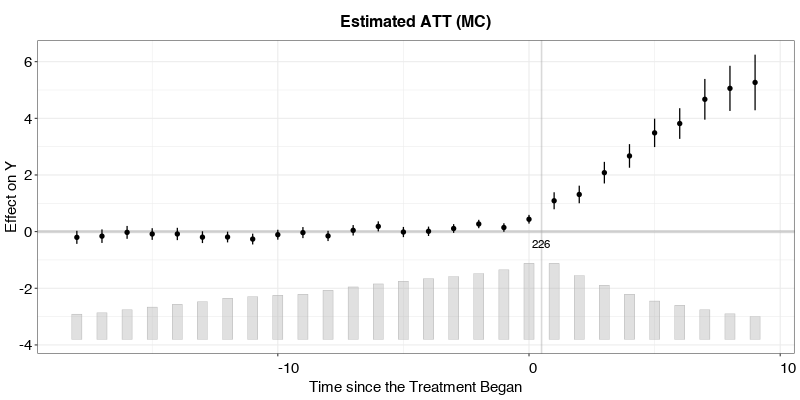

In [12]:
out_mc.setPlot(main = "Estimated ATT (MC)")
fpy.png_show(out_mc.plot_para)

## Balanced Sample

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




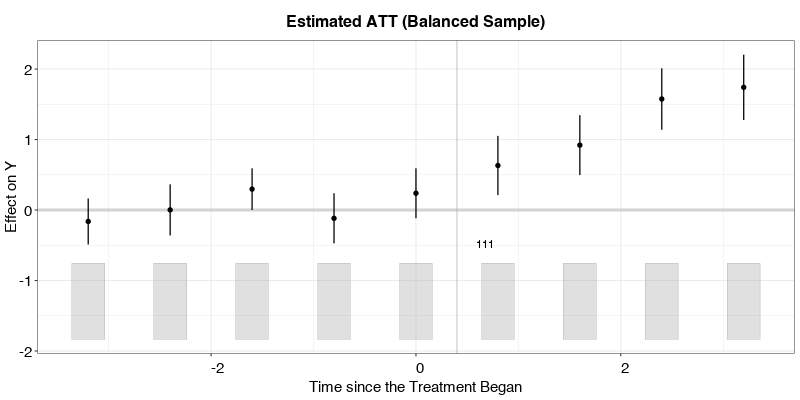

In [13]:
out_bal = Fect()
out_bal.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  balance_period = [-4, 4], force = "two-way", method = "ife", 
  CV = False, r = 2, se = True, nboots = 200, parallel = True)
#> Parallel computing ...
#> Bootstrapping for uncertainties ...
#> 200 runs
out_bal.setPlot(main = "Estimated ATT (Balanced Sample)")
fpy.png_show(out_bal.plot_para)

## Box plots
One way to understand HTE is to use a series of box plots to visualize the estimated individualistic treatment effects of observations under the treatment condition (by setting type = "box"). Although these effects are not identified at the individual observation level, their level of dispersion is informative of treatment effects heterogeneity at different (relative) time periods, as well as model performance.

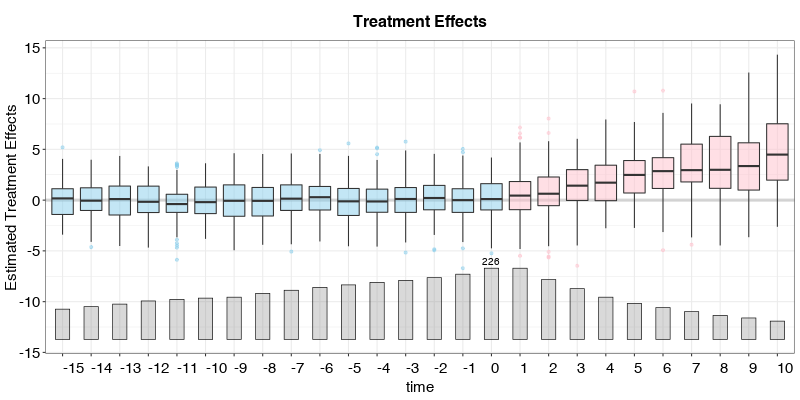

In [14]:
out_ife.setPlot(ptype = "box", xlim = [-15, 10])
fpy.png_show(out_ife.plot_para)

## By calendar time
Another way to explore HTE is to investigate how the treatment effect evolves over time. In the plot below, the point estimates represents the ATTs by calendar time; the blue curve and band represent a lowess fit of the estimates and its 95% confidence interval, respectively; and the red horizontal dashed line represents the ATT (averaged over all time periods).

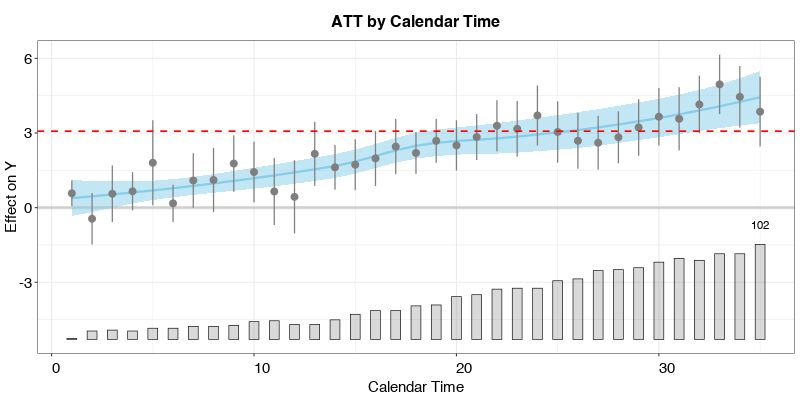

In [15]:
out_ife.setPlot(ptype = "calendar", xlim = [1, 35])
fpy.png_show(out_ife.plot_para)

# Diagostic tests
We provide three types of diagnostic tests: (1) a placebo test, (2) a test for (no) pretrend, and (3) a test for (no) carry-over effects. For each test, we support both the difference-in-means (DIM) approach and the equivalence approach. The details are provided in the paper.

## Placebo tests
We provide a placebo test for a settled model—hence, cross-validation is not allowed—by setting placeboTest = TRUE. We specify a range of pretreatment periods as “placebo periods” in option placebo.period to remove observations in the specified range for model fitting, and then test whether the estimated ATT in this range is significantly different from zero. Below, we set [-2, 0] as the placebo periods.



In [16]:
out_fect_p, out_ife_p, out_mc_p = Fect(), Fect(), Fect()
out_fect_p.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", parallel = True, se = True, CV = 0,
  nboots = 200, placeboTest = True, placebo_period = [-2, 0])

out_ife_p.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", method = "ife", r = 2, CV = 0, parallel = True, se = True,
  nboots = 200, placeboTest = True, placebo_period = [-2, 0])

# TBD: how to call lambda = out.mc$lambda.cv
out_mc_p.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", method = "mc",parallel = True, se = True,plambda = out_mc.getPara()["lambda_cv"], CV = 0,
  nboots = 200, placeboTest = True, placebo_period = [-2, 0])

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs


R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs


R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




The placebo test conducts two types of tests:

t test. If t-test p-value is smaller than a pre-specified threshold (e.g. 5%), we reject the null of no-differences. Hence, the placebo test is deemed failed.

TOST. The TOST checks whether the 90% confidence intervals for estimated ATTs in the placebo period exceed a pre-specified range (defined by a threshold), or the equivalence range. A TOST p-value smaller than a pre-specified threshold suggests that the null of difference bigger than the threshold is rejected; hence, the placebo test is passed.

By default, the plot will display the p-value of the 𝑡-test (stats = "placebo.p"). Users can also add the p-value of a corresponding TOST test by setting stats = c("placebo.p","equiv.p"). A larger placebo p-value from a t-test and a smaller placebo TOST p-value are preferred.

Users can turn off the dotted plot in placebo periods by setting vis = "none".



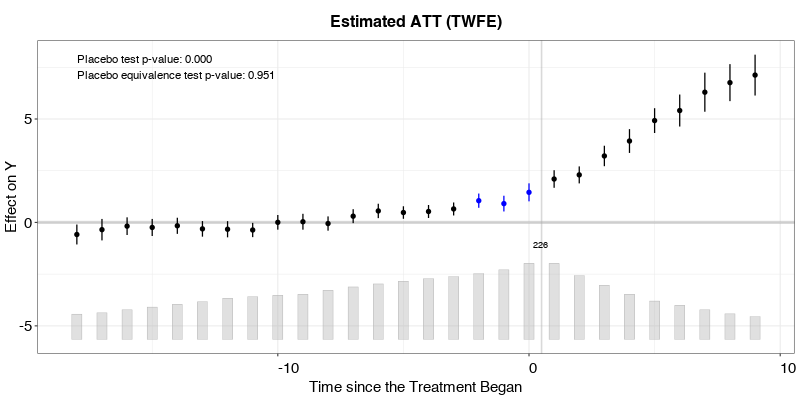

In [17]:
out_fect_p.setPlot(cex_text = 0.8, stats = ["placebo.p","equiv.p"], 
     main = "Estimated ATT (TWFE)")
fpy.png_show(out_fect_p.plot_para)

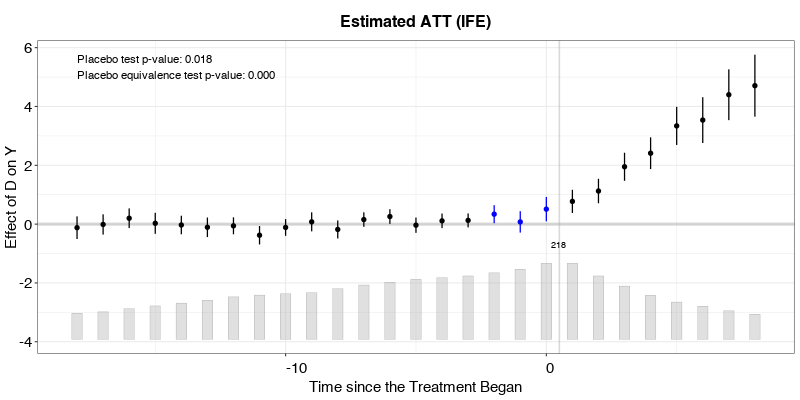

In [18]:
out_ife_p.setPlot(ylab = "Effect of D on Y", main = "Estimated ATT (IFE)", 
     cex_text = 0.8, stats = ["placebo.p","equiv.p"])
fpy.png_show(out_ife_p.plot_para)

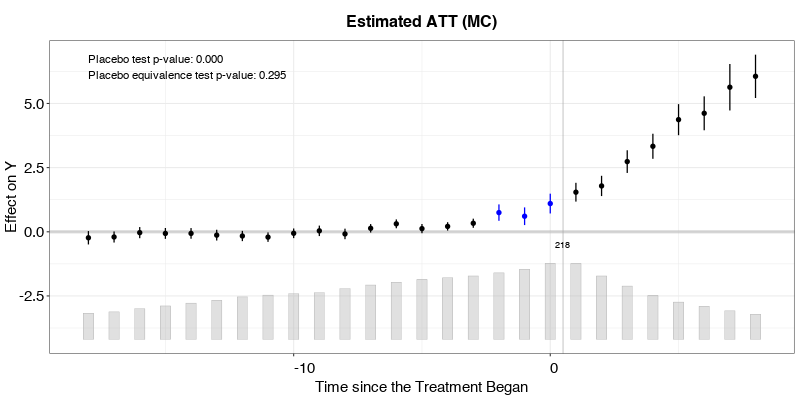

In [19]:
out_mc_p.setPlot(vis = "none", cex_text = 0.8, stats = ["placebo.p","equiv.p"],
     main = "Estimated ATT (MC)")
fpy.png_show(out_mc_p.plot_para)

The results in the placebo test confirm that IFEct is a better model than MC for this particular DGP.

## Tests for (no) pre-trend
We introduce two statistical tests for the presence of a pre-trend (or the lack thereof). The first test is an 𝐹 test for zero residual averages in the pretreatment periods. The second test is a two-one-sided 𝑡 (TOST) test, a type of equivalence tests.

**F test**. We offer a goodness-of-fit test (a variant of the 𝐹 test) and to gauge the presence of pretreatment (differential) trends. A larger F-test p-value suggests a better pre-trend fitting. Users can specify a test range in option pre.periods. For example, pre.periods = [-4,0] means that we test pretreatment trend of the last 5 periods prior to the treatment (from period -4 to period 0). If pre.period = None (default), all pretreatment periods in which the number of treated units exceeds the total number of treated units * proportion will be included in the test.

**TOST**. The TOST checks whether the 90% confidence intervals for estimated ATTs in the pretreatment periods (again, subject to the proportion option) exceed a pre-specified range, or the equivalence range. A smaller TOST p-value suggests a better pre-trend fitting. While users can check the values of confidence intervals, we give a visualization of the equivalence test. We can plot the pretreatment residual average with the equivalence confidence intervals by setting type = "equiv". Option tost.threshold sets the equivalence range (the default is 0.36𝜎𝜖 in which 𝜎𝜖 is the standard deviation of the outcome variable after two-way fixed effects are partialed out). By setting range = "both", both the minimum range (in gray) and the equivalence range (in red) are drawn.

On the topleft corner of the graph, we show several statistics of the user’s choice. User can choose which statistics to show by setting stats = c("none", "F.stat", "F.p", "F.equiv.p", "equiv.p") which corresponds to not showing any, the 𝐹 statistic, the p-value for the 𝐹 test, the p-value for the equivalence 𝐹 test, the (maximum) p-value for the the TOST tests, respectively. For the gap plot, the default is stats = "none". For the equivalence plot, the default is stats = ["equiv.p, F.p"]. Users can also change the labels of statistics using the stats.labs options. Users can adjust its position using the stats.pos option, for example stats.pos = [-30, 4]. To turn off the statistics, set stats = "none".

Below, we visualize the result of the equivalence test for each of the three estimators using our simulated data. These figures show that both the IFE and MC methods pass the equivalence test while the FE method does not.

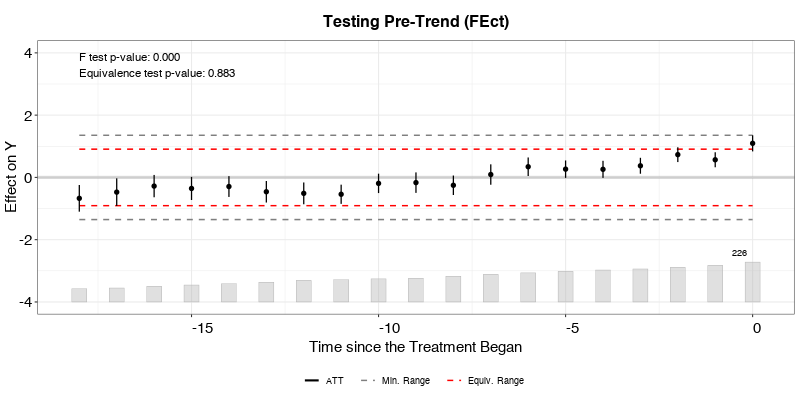

In [20]:
out_fect.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend (FEct)", cex_text = 0.8)
fpy.png_show(out_fect.plot_para)

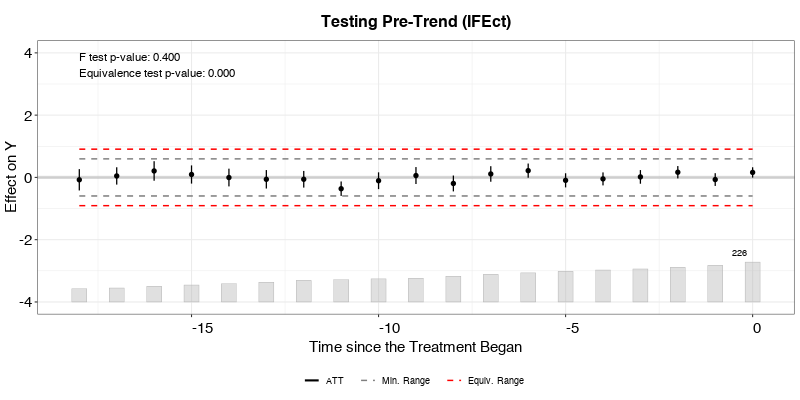

In [21]:
out_ife.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend (IFEct)", cex_text = 0.8)
fpy.png_show(out_ife.plot_para)

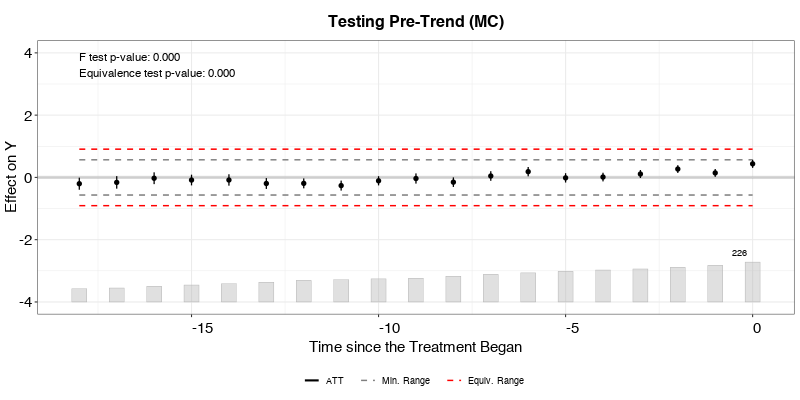

In [22]:
out_mc.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend (MC)", cex_text = 0.8)
fpy.png_show(out_mc.plot_para)

From the above plots, we see that FEct fails both tests; IFEct passes both tests using a conventional test size (5%); and MC fails the F tests, but passes the TOST (equivalence) test. Hence, we may conclude that IFEct is a more suitable model.

## Leave-one-out pre-trend test
Instead of using estimated ATTs for periods prior to the treatment to test for pre-trends, we can use a leave-one-out (LOO) approach (loo = TRUE) to consecutively hide one pretreatment period (relative to the timing of the treatment) and repeatedly estimate the pseudo treatment effects for that pretreatment period. The LOO approach can be understood as an extension of the placebo test. It has the benefit of providing users with a more holistic view of whether the identifying assumptions likely hold. However, as the program needs to conduct uncertainty estimates for each turn, it is much more time-consuming than the original one.

In [23]:
out_fect_loo, out_ife_loo, out_mc_loo = Fect(), Fect(), Fect()

out_fect_loo.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "fe", force = "two-way", se = True, parallel = True, nboots = 200, loo = True)

out_ife_loo.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "ife", force = "two-way", se = True, parallel = True, nboots = 200, loo = True)

out_mc_loo.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "mc", force = "two-way", se = True, parallel = True, nboots = 200, loo = True)

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs


R[write to console]: 
Out-of-Sample Test...


R[write to console]: 


R[write to console]: Pre-period 0 (one period before treatment)

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -1

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -2

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -3

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -4

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -5

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -6

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -7

R[write to console]: 


R[write to console]: 


R[write to console]: Pre-period -8

R[write to console]: 


R[write to console]: 


R[write 

After the LOO estimation, one can plot these LOO pre-trends in the gap plot or the equivalence plot by setting loo = True in the plot function.

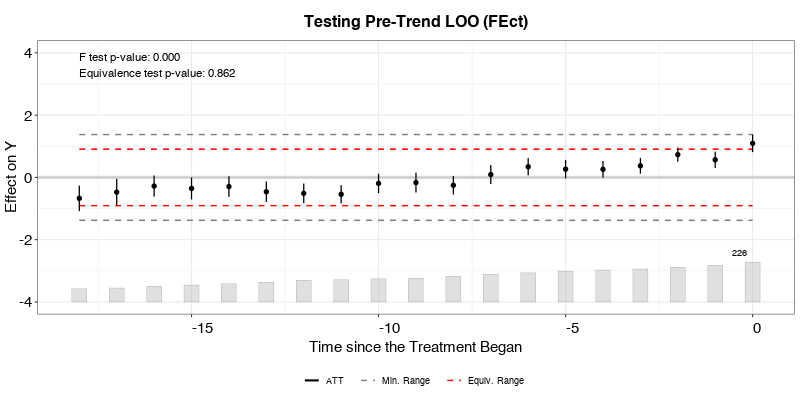

In [24]:
out_fect_loo.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend LOO (FEct)", cex_text = 0.8)
fpy.png_show(out_fect_loo.plot_para)

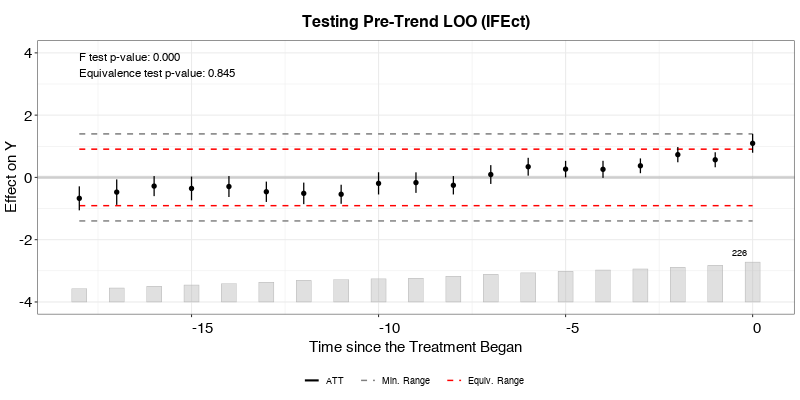

In [25]:
out_ife_loo.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend LOO (IFEct)", cex_text = 0.8)
fpy.png_show(out_ife_loo.plot_para)

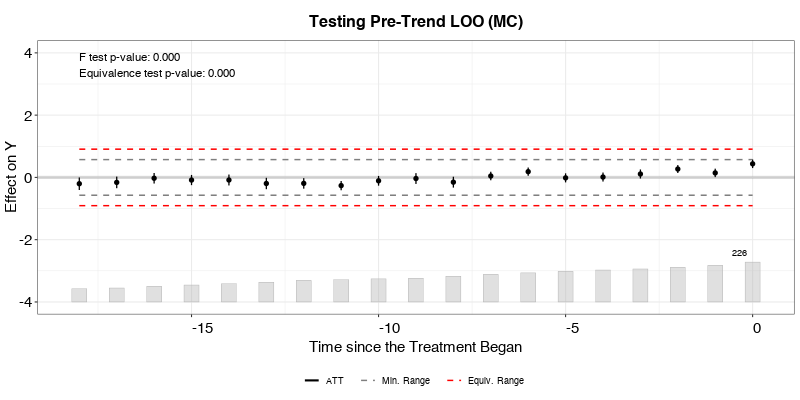

In [26]:
out_mc_loo.setPlot(ptype = "equiv", ylim = [-4,4], 
     cex_legend = 0.6, main = "Testing Pre-Trend LOO (MC)", cex_text = 0.8)
fpy.png_show(out_mc_loo.plot_para)

Note that the LOO test usually takes lots of computational power. For our example, we find that the IFE estimator still passes both the F test and the equivalence test based on its LOO pre-trends, while the MC estimator fails both tests.

## Exiting the treatment
fect allows the treatment to switch back and forth and provides diagnostic tools for this setting. After the estimation, we can visualize the period-wise ATTs relative to the exit of treatments by setting type = "exit" (one can still draw the classic gap plot by setting type = "gap"). The x-axis is then realigned based on the timing of the treatment’s exit, not onset, e.g., 1 represents 1 period after the treatment ends.

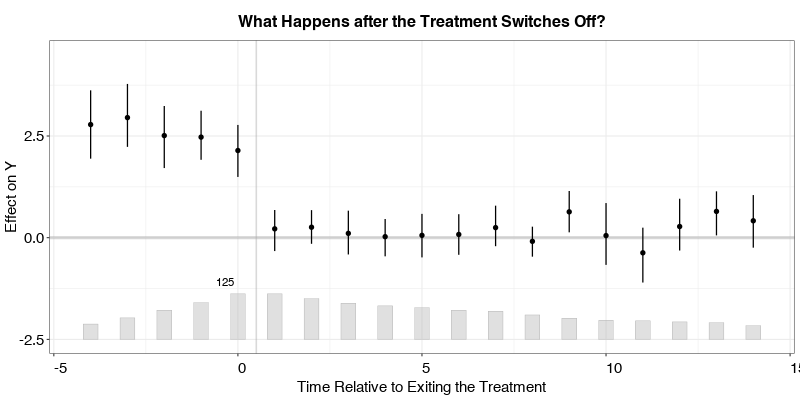

In [27]:
out_fect.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     main = "What Happens after the Treatment Switches Off?")
fpy.png_show(out_fect.plot_para)

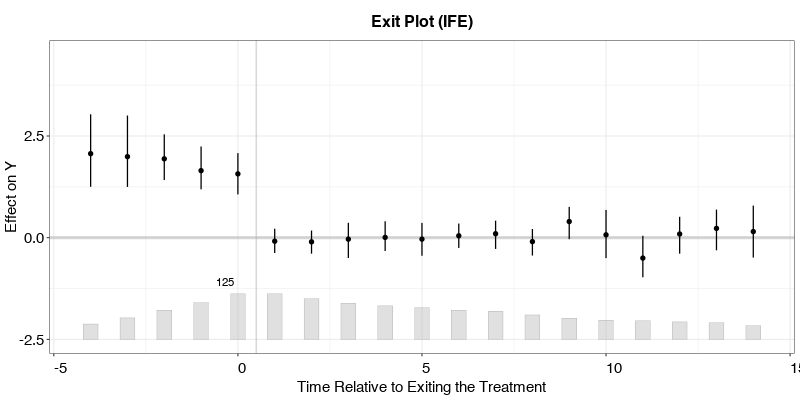

In [28]:
out_ife.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     main = "Exit Plot (IFE)")
fpy.png_show(out_ife.plot_para)

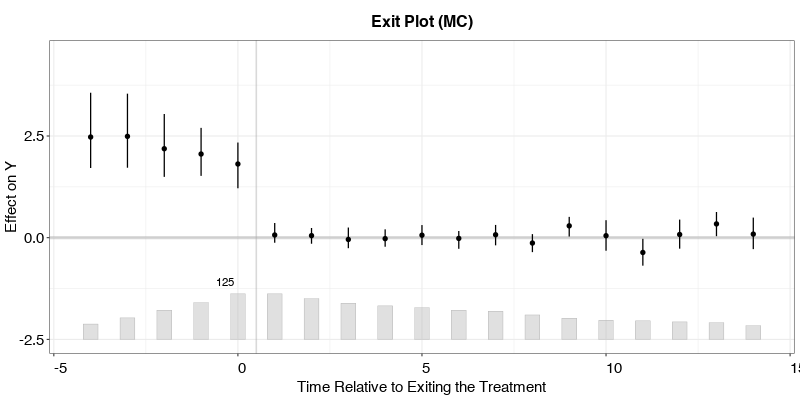

In [29]:
out_mc.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     main = "Exit Plot (MC)")
fpy.png_show(out_mc.plot_para)

## Tests for (no) carryover effects
The idea of the placebo test can be extended to testing the presence of carryover effects. Instead of hiding a few periods right before the treatment starts, we hide a few periods right after the treatment ends. If carryover effects do not exist, we would expect the average prediction error in those periods to be close to zero. To perform the carryover test, we set the option carryoverTest = True. We can treat a range of exit-treatment periods in option carryover.period to remove observations in the specified range for model fitting, and then test whether the estimated ATT in this range is significantly different from zero.

Below, we set carryover.period = [1, 3]. As we deduct the treatment effect from the outcome in simdata, we expect the average prediction error for these removed periods to be close to zero.

In [30]:
out_fect_c, out_ife_c, out_mc_c = Fect(), Fect(), Fect()
out_fect_c.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", parallel = True, se = True, CV = 0, 
  nboots = 200, carryoverTest = True, carryover_period = [1, 3])

out_ife_c.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", method = "ife", r = 2, parallel = True, se = True, CV = 0, 
  nboots = 200, carryoverTest = True, carryover_period = [1, 3])

out_mc_c.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", method = "mc", plambda = out_mc.getPara()["lambda_cv"] ,parallel = True, se = True, CV = 0, 
  nboots = 200, carryoverTest = True, carryover_period = [1, 3])

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs


R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs


R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




Like the placebo test, the plot will display the p-value of the carryover effect test (stats = "carryover.p"). Users can also add the p-value of a corresponding TOST test by setting stats = ["carryover.p","equiv.p"].

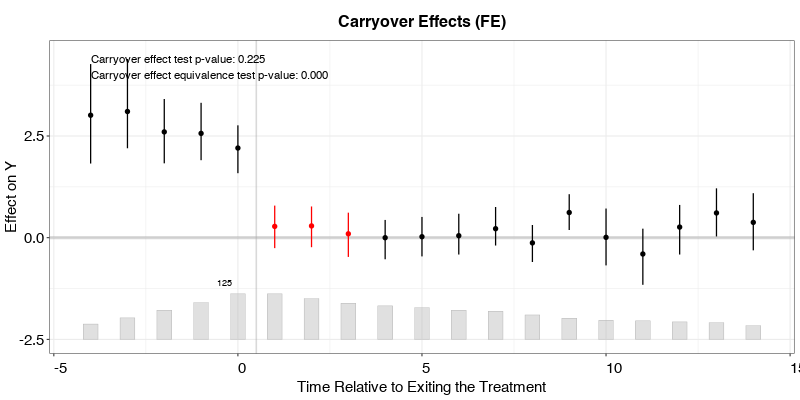

In [31]:
out_fect_c.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     cex_text = 0.8, main = "Carryover Effects (FE)")
fpy.png_show(out_fect_c.plot_para)

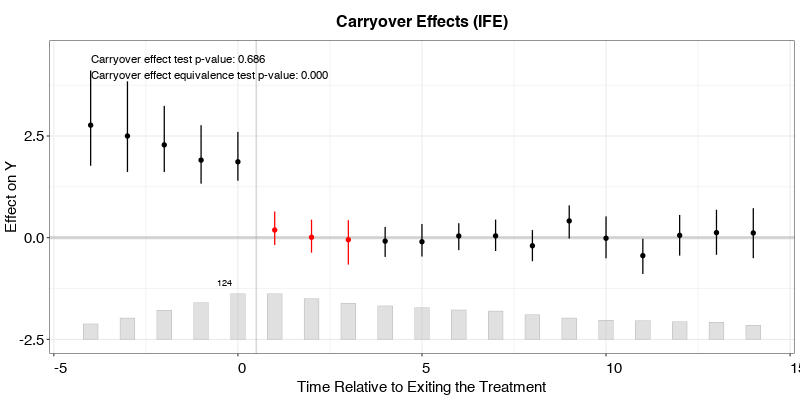

In [32]:
out_ife_c.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     cex_text = 0.8, main = "Carryover Effects (IFE)")
fpy.png_show(out_ife_c.plot_para)

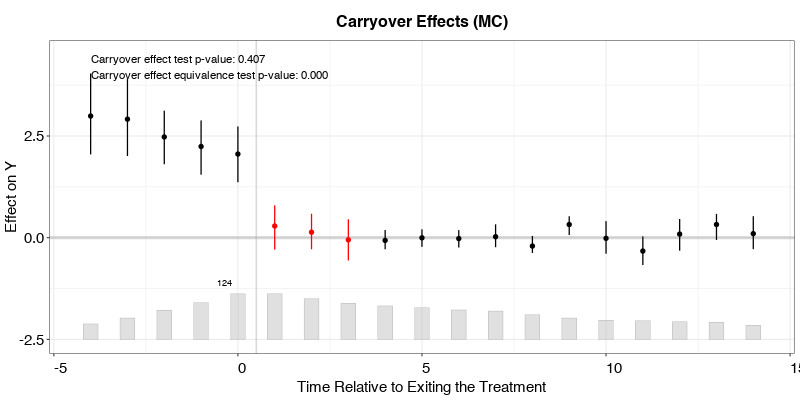

In [33]:
out_mc_c.setPlot(ptype = "exit", ylim = [-2.5,4.5], 
     cex_text = 0.8, main = "Carryover Effects (MC)")
fpy.png_show(out_mc_c.plot_para)

Once again, the IFE estimator outperforms the other two.

Using real-world data, researchers will likely find that carryover effects exist. If such effects are limited, researchers can consider removing a few periods after the treatment ended for the treated units from the first-stage estimation (using the carryover.period option) and re-estimated the model (and re-conduct the test). We provide such an example in the paper. Here, we illustrate the option using simdata.

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




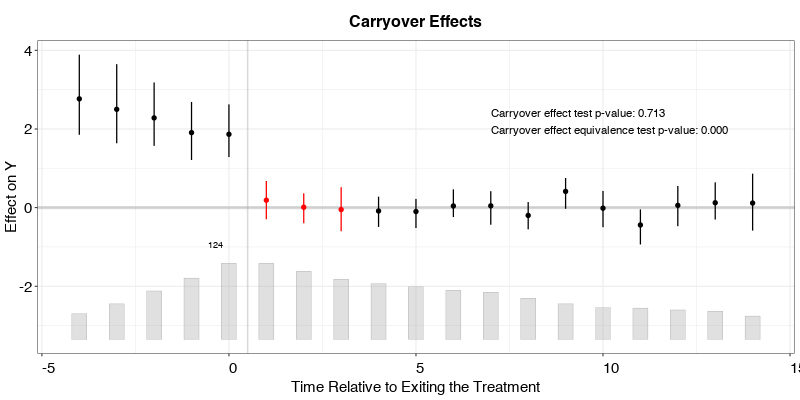

In [34]:
out_ife_rm_test = Fect()

out_ife_rm_test.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id", "time"],
  force = "two-way", method = "ife", r = 2, CV = 0, 
  parallel = True, se = True,  carryover_rm = 3,
  nboots = 200, carryoverTest = True, carryover_period = [1, 3]) # remove three periods

out_ife_rm_test.setPlot(cex_text = 0.8, stats_pos = [7, 2.5])
fpy.png_show(out_ife_rm_test.plot_para)

In the above plot, the three periods in blue are droppred from the first-stage estimation of the factor model while the periods in red are reserved for the (no) carryover effects test.



Other options
We provide a few other options for estimation and visualization.

More visualization options
The plot() function shipped in fect offers some options that help to improve the visualization.

We can remove the bar plot at the bottom of the plot by setting count = False

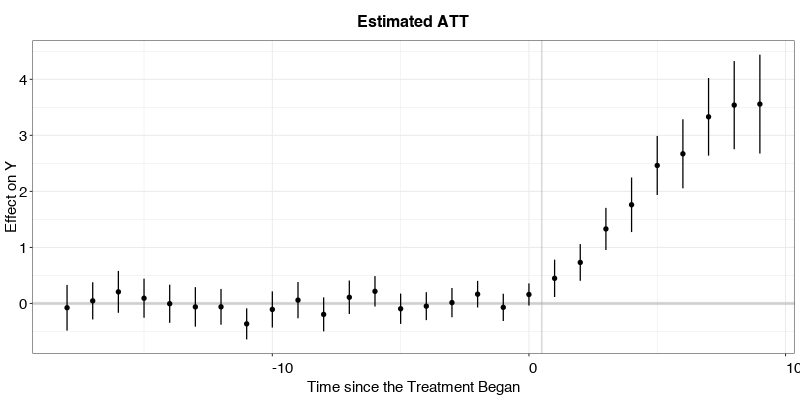

In [35]:
out_ife.setPlot(count = False)
fpy.png_show(out_ife.plot_para)

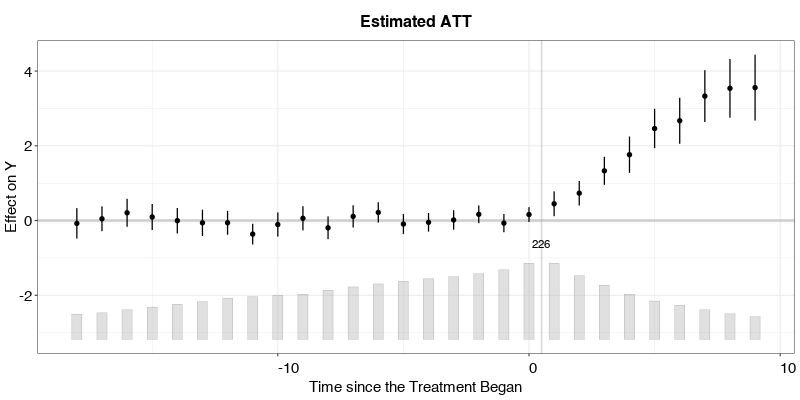

In [36]:
out_ife.setPlot(show_points = True)
fpy.png_show(out_ife.plot_para)

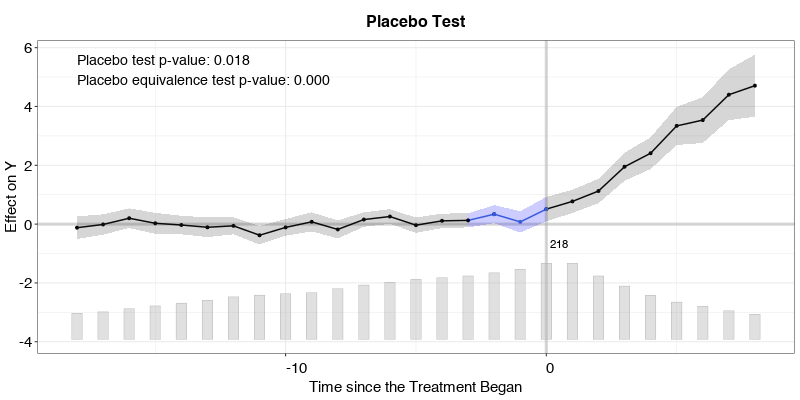

In [37]:
out_ife_p.setPlot(show_points = False)
fpy.png_show(out_ife_p.plot_para)

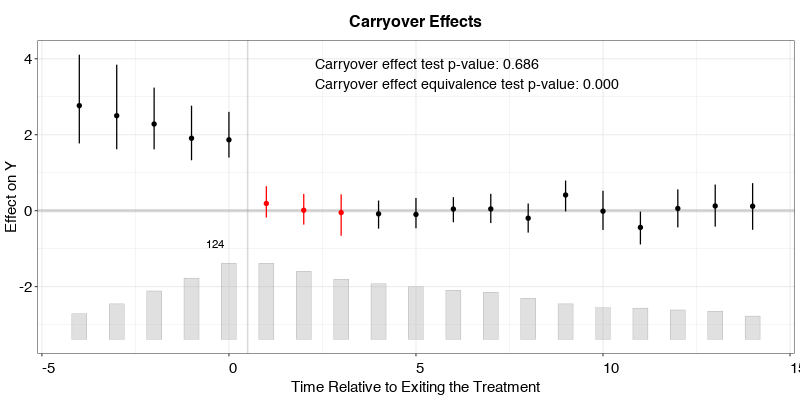

In [38]:
out_ife_c.setPlot(ptype = "exit", show_points = True, stats_pos = [2.3,4])
fpy.png_show(out_ife_c.plot_para)

By setting the option type = "status", we can visualize the treatment status of all observations. We only present the label of the time by setting axis_lab = "time".

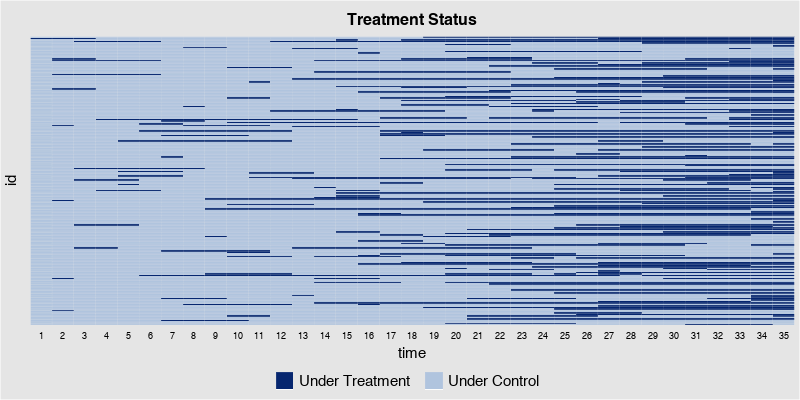

In [39]:
out_fect.setPlot(ptype = 'status', axis_lab = "time", cex_axis  = 0.6)
fpy.png_show(out_fect.plot_para)

For the placebo test, the manually hided observations are marked in cyan. We can show only a sub-group’s treatment status by specifying the option id to certain units.

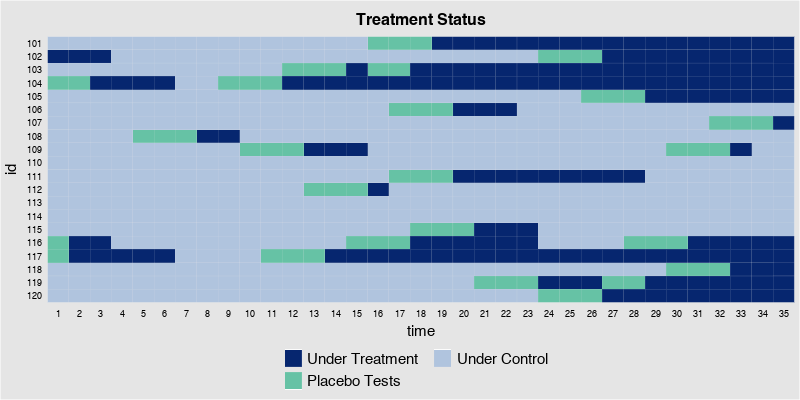

In [40]:
out_fect_p.setPlot(ptype = 'status', axis_lab = "both", id = [i for i in range(101,121)], cex_axis  = 0.6)
fpy.png_show(out_fect_p.plot_para)

For the carryover test, the manually hidden observations are marked in light red. We can also move grid lines by setting gridOff = True.

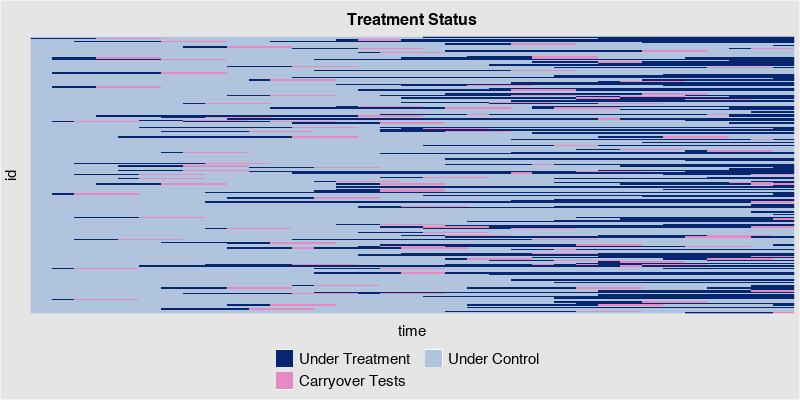

In [41]:
out_fect_c.setPlot(ptype = 'status', axis_lab = "off", gridOff = True)
fpy.png_show(out_fect_c.plot_para)

For the carryover test with removed observation, the removed observations are marked in yellow.

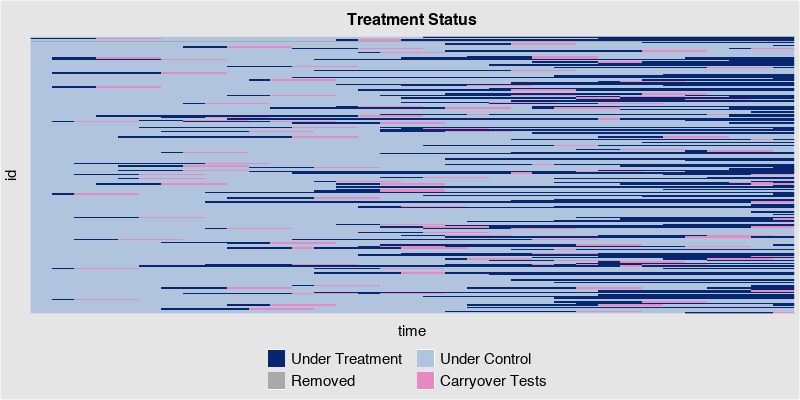

In [42]:
out_ife_rm_test.setPlot(ptype = 'status', axis_lab = "off", gridOff = True)
fpy.png_show(out_ife_rm_test.plot_para)

## Average cohort effect
fect allows us to estimate and visualize the ATTs for sub-groups of treated units. For example, it can draw the gap plot for units that adopt the treatment at the same time under staggered adoption, which is defined as “Cohort” in Sun and Abraham (2021). Our simulated dataset is not ideal to demonstrate this functionality because the treatment switches on and off. To improve feasibility, we define a cohort as a group of treated units that first adopt the treatment at the same time.

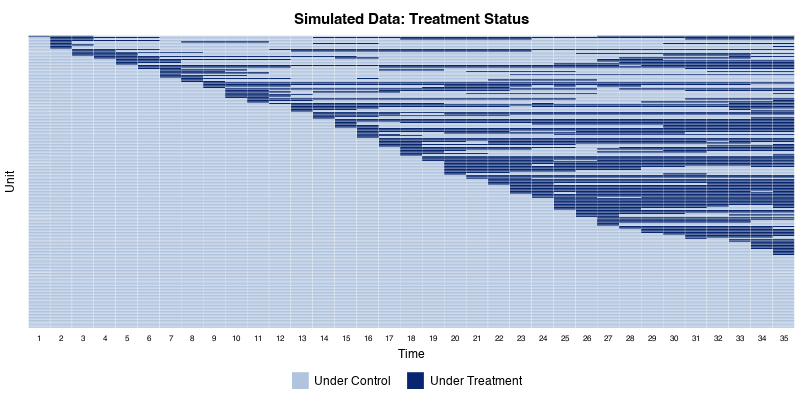

In [29]:
pn = fpy.panelview("Y ~ D", data = simdata, index = ["id","time"], by_timing = True,
  axis_lab = "time", xlab = "Time", ylab = "Unit", 
  background = "white", main = "Simulated Data: Treatment Status")
fpy.png_show(pn)

The function get.cohort() shipped in fect can generate a new variable “Cohort” based on the timing when treated units first get treated.

In [ ]:
simdata_cohort = fpy.getCohort(data = simdata, D = "D", index = ["id","time"])
print(simdata_cohort['Cohort'].value_counts())

We can also pass a list of intervals for first get-treated time into the entry.time option of get.cohort(). For example, we can categorize all treated units into the group that adopts the treatment between time 21 and 27, and the group that adopts the treatment in time 30 and 33.

In [ ]:
simdata_cohort2 = fpy.getCohort(data = simdata, D = "D", index = ["id","time"],entry_time = [[21,27],[30,33]])
print(simdata_cohort2['Cohort'].value_counts())

By setting the option group = "Cohort", fect estimates the ATT for each specified sub-group and saves it for further visualization.

In [ ]:
out_ife_g, out_ife_g_p = Fect(),Fect()
out_ife_g.setFect("Y ~ D + X1 + X2", data = simdata_cohort, index = ["id","time"], 
          force = "two-way", method = "ife", CV = True, r = [0, 5], 
          se = True, nboots = 200, parallel = True, group = 'Cohort')
out_ife_g_p =fpy.fect("Y ~ D + X1 + X2", data = simdata_cohort, index = ["id","time"], 
          force = "two-way", method = "ife", CV = False, 
          placeboTest = True, placebo_period = [-2,0], 
          se = True, nboots = 200, parallel = True, group = 'Cohort')

Then one can draw the gap plot, as well as the equivalence plot, for each sub-group. Here we present the gap plot for Cohort 22.

In [ ]:
out_ife_g.setPlot(show_group = "Cohort:22", 
          xlim = [-15, 10], ylim = [-10, 10])
fpy.png_show(out_ife_g.plot_para)

## Other estimators
The logic of imputation estimator can be extended to more settings.

### Complex Fixed Effects. 
When there exists more dimensions of fixed effects in addition to the unit and time fixed effects, we can resort to the “cfe”(complex fixed effects) estimator to impute the counterfactual based on a linear model with multiple levels of fixed effects. It accepts two options: sfe specifies simple (additive) fixed effects in addition to the unit and time fixed effects and cfe receives a list object and each component in the list is a vector of length 2. The value of the first element of each component is the name of group variable for which fixed effects are to be estimated (e.g. unit names); the value of the second element is the name of a regressor (e.g., a time trend). For example, we can estimate a model with an additional fixed effects FE3 along with a unit-specific time trend.



R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




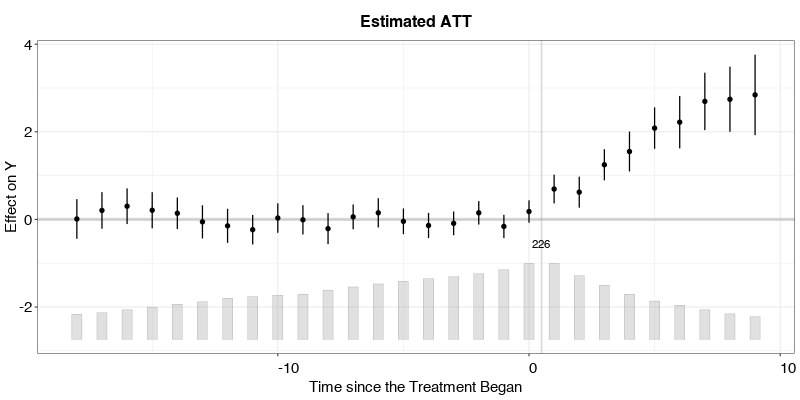

In [4]:
simdata["FE3"] = np.random.randint(1,6,simdata.shape[0])
out_cfe = Fect()
out_cfe.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "cfe", force = "two-way", se = True, parallel = True, nboots = 200,
  sfe = ["FE3"], cfe = [["id","time"]])
out_cfe.setPlot()
fpy.png_show(out_cfe.plot_para)

**Polynomial**. When only need to include unit-specific time trends, we can use the “polynomial” estimator. By setting degree = 2, we can estimate the ATT based on a linear model with unit and time fixed effects, along with a unit-specific time trend and quadratic time trend.

R[write to console]: Parallel computing ...


R[write to console]: Bootstrapping for uncertainties ... 

R[write to console]: 200 runs




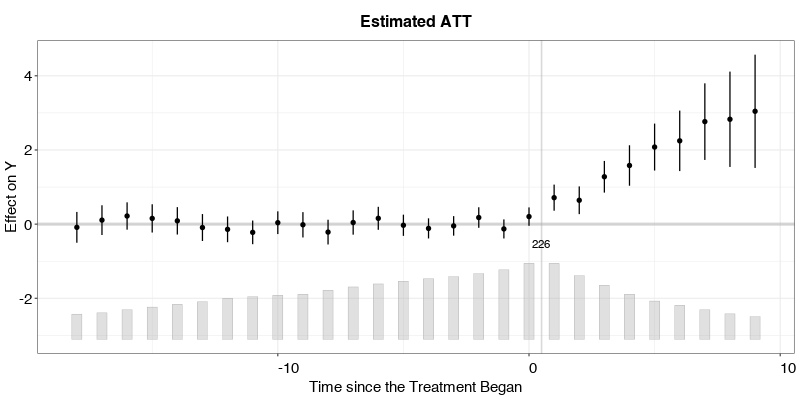

In [30]:
out_poly = Fect()
out_poly.setFect("Y ~ D + X1 + X2", data = simdata, index = ["id","time"], 
  method = "polynomial", force = "two-way", se = True, parallel = True, nboots = 200,
  degree = 2)
out_poly.setPlot()
fpy.png_show(out_poly.plot_para)

## Additional Notes
1.By default, the program will drop the units that have no larger than 5 observations under control, which is the reason why sometimes there are less available units in the placebo test or carryover test than in the original estimation. We can specify a preferred criteria in the option min.T0 (default to 5). As a rule of thumb for the IFE estimator, the minimum number of observations under control for a unit should be larger than the specified number of factor r.

2.We can get replicable results by setting the option seed to a certain integer, no matter whether the parallel computing is used.

3.When na_rm = False (default), the program allows observations to have missing outcomes 𝑌 or covariates 𝑋 but decided treatment statuses 𝐷. Otherwise the program will drop all observations that have missing values in outcomes, treatments, or covariates.